# Deep Learning API DEMO 1

In [43]:
%matplotlib inline

from swat import * # needed to start a CAS server.
from dl_api.images import Image # No extra packages needed other than the default packages from Anaconda
import pandas as pd # needed to adjust the display mode.
pd.options.display.max_colwidth = 1000

In [67]:
sess = CAS('cas01.unx.sas.com', 14931, nworkers=3)

In [68]:
# sess.endsession()

# Image Class

In [69]:
my_images = Image(sess)

NOTE: Added action set 'image'.


## Load Images

In [71]:
my_images.load(path='/dept/cas/leliuz/WildTrack/Data0531/Cheetah_Leopard')

NOTE: Loaded 669 images from /dept/cas/leliuz/WildTrack/Data0531/Cheetah_Leopard into Cloud Analytic Services table ImageData_twKBDr.


In [70]:
my_images.load?

## Summarize Images

In [72]:
my_images.summary

NOTE: Table IMAGEDATA_TWKBDR contains compressed images.
NOTE: 669 out of 669 images were scanned and results were saved to the summary table.


[Summary]

     Column    jpg  minWidth  maxWidth  minHeight  maxHeight   meanWidth  \
 0  _image_  669.0     348.0    2543.0      374.0     2898.0  1181.64574   
 
     meanHeight  mean1stChannel  min1stChannel  max1stChannel  mean2ndChannel  \
 0  1213.333333       77.686499            0.0          255.0       94.279064   
 
    min2ndChannel  max2ndChannel  mean3rdChannel  min3rdChannel  max3rdChannel  
 0            0.0          255.0        124.9212            0.0          255.0  

+ Elapsed: 1.66s, user: 42.1s, sys: 2.21s, mem: 5.26mb

In [73]:
my_images.channel_means

NOTE: Table IMAGEDATA_TWKBDR contains compressed images.
NOTE: 669 out of 669 images were scanned and results were saved to the summary table.


[77.686498829441931, 94.279063860130648, 124.92120014235084]

## Image Frequency

In [74]:
my_images.freq()

[Frequency]

 Frequency for IMAGEDATA_TWKBDR
 
     Column  CharVar   FmtVar  Level  Frequency
 0  _label_  Cheetah  Cheetah      1      310.0
 1  _label_  Leopard  Leopard      2      359.0

+ Elapsed: 0.0207s, user: 0.027s, sys: 0.045s, mem: 47.6mb

###### label frequency, may move to summary

## Split Images

In [77]:
tr_img, te_img = my_images.train_test_split(test_rate=20)

NOTE: Using SEED=732767407 for sampling.
NOTE: Using SEED=1123254723 for sampling.
NOTE: Using SEED=959356310 for sampling.


###### Note: two new image class objects are created.

In [78]:
tr_img.freq()

[Frequency]

 Frequency for IMAGEDATA_19SJRL
 
     Column  CharVar   FmtVar  Level  Frequency
 0  _label_  Cheetah  Cheetah      1      248.0
 1  _label_  Leopard  Leopard      2      287.0

+ Elapsed: 0.0229s, user: 0.021s, sys: 0.048s, mem: 47.6mb

## Display Images

NOTE: Table IMAGEDATA_TWKBDR contains compressed images.


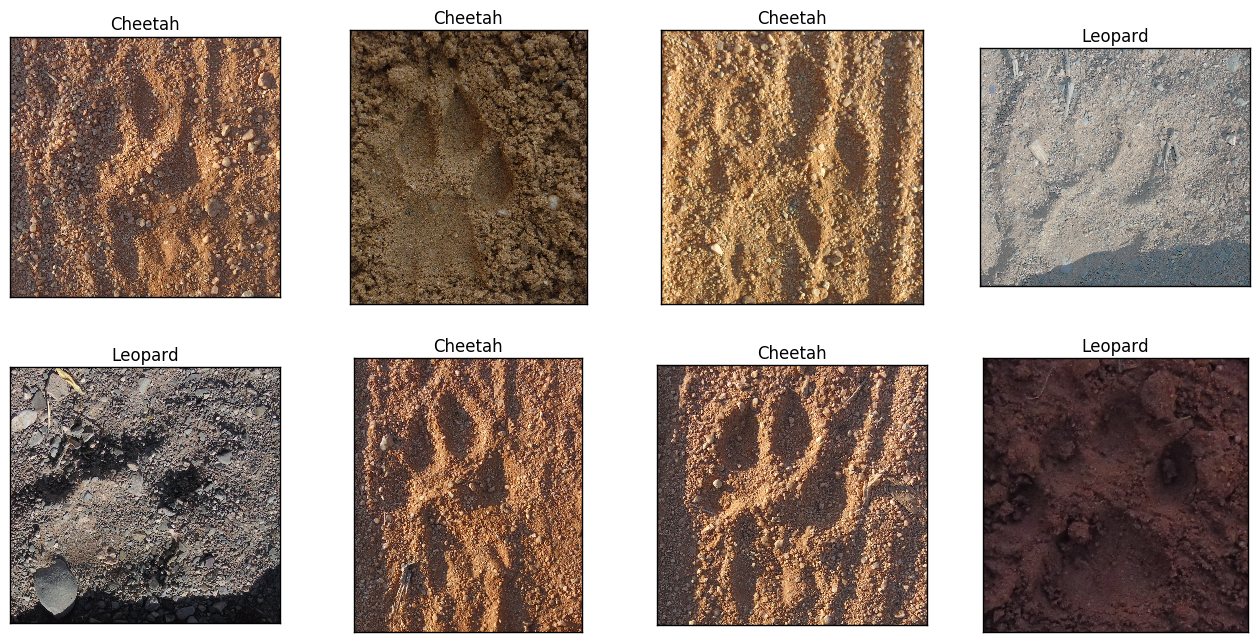

In [79]:
my_images.display(ncol=4,nimages=8,random_flag=True)

## Resize Images

In [52]:
my_images.resize(width=512)

NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.
NOTE: 669 out of 669 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_YlhZ3N.


NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.


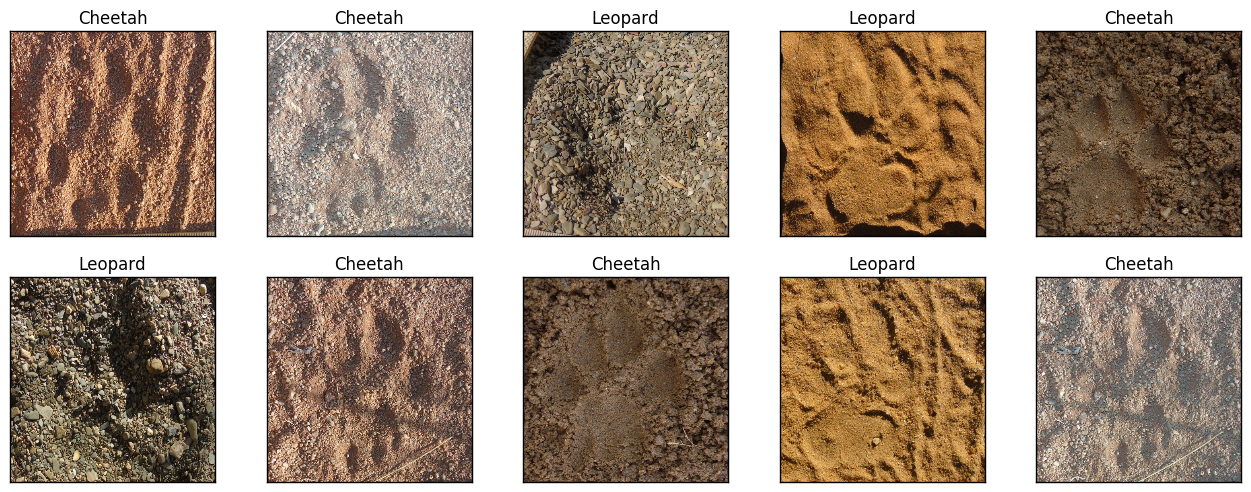

In [56]:
my_images.display(nimages=10,ncol=5,random_flag=True)

## Crop Images

In [57]:
my_images.crop(width=480)

NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.
NOTE: 669 out of 669 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_YlhZ3N.


NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.


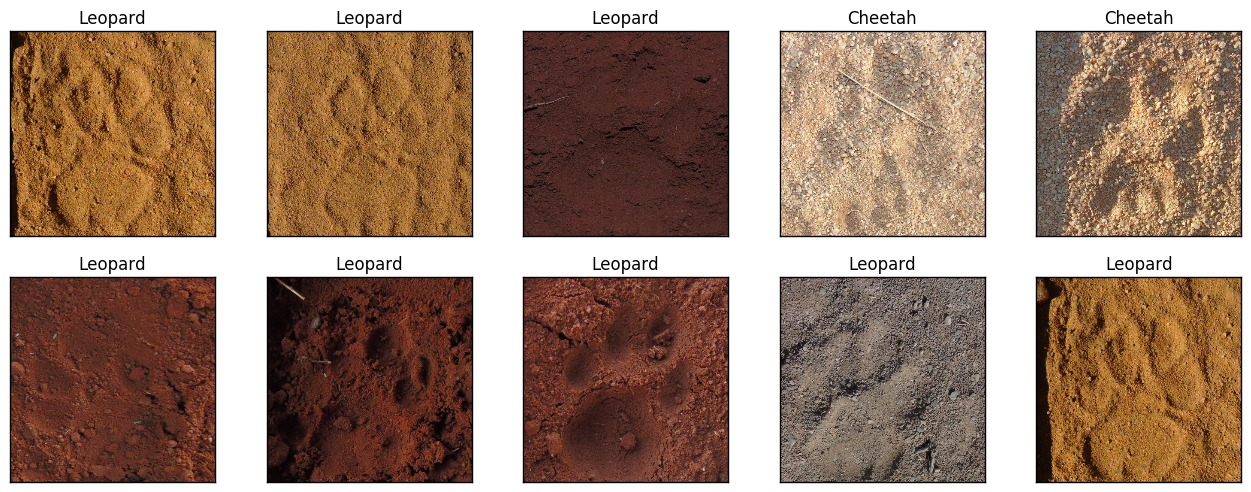

In [59]:
my_images.display(nimages=10,ncol=5,random_flag=True)

## Extract Patches

In [60]:
my_images.patches(width=96)

NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.
NOTE: 16725 images were produced successfully out of 669 input images and saved as compressed images to the Cloud Analytic Services table ImageData_YlhZ3N.


NOTE: Table IMAGEDATA_YLHZ3N contains compressed images.


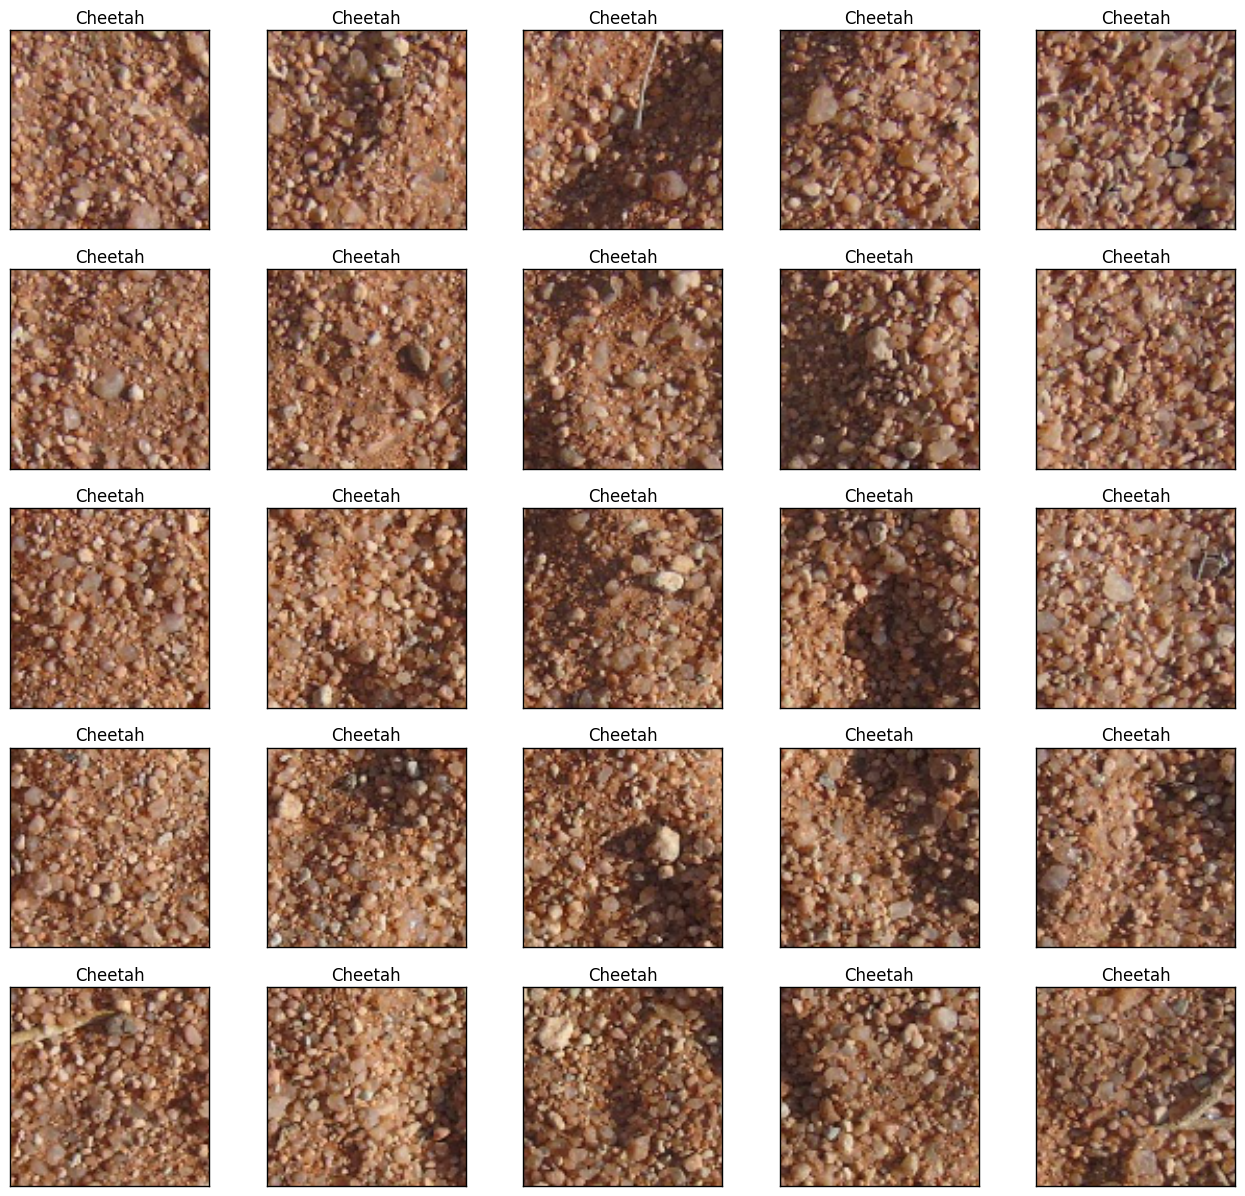

In [61]:
my_images.display(nimages=25,ncol=5)#,random_flag=True)

## Save Images

In [63]:
my_images.save(path = '/dept/cas/leliuz/WildTrack/patched_images')

NOTE: Cloud Analytic Services added the caslib 'Caslib_FiNaCY'.
NOTE: Wrote 16725 images from Cloud Analytic Services table IMAGEDATA_YLHZ3N into /dept/cas/leliuz/WildTrack/patched_images/.
NOTE: Cloud Analytic Services removed the caslib 'Caslib_FiNaCY'.


## Drop Images

In [18]:
my_images.drop()

NOTE: Cloud Analytic Services dropped table ImageData_qICjXZ from caslib CASUSERHDFS(leliuz).


In [19]:
del my_images

## A different way of using this class

In [20]:
my_images = Image(sess,path='/dept/cas/leliuz/WildTrack/Data0531/Cheetah_Leopard')

NOTE: Loaded 669 images from /dept/cas/leliuz/WildTrack/Data0531/Cheetah_Leopard into Cloud Analytic Services table ImageData_LKZpWl.


In [21]:
img_resize = my_images.resize(width=512,height=256,replace=False)

NOTE: Table IMAGEDATA_LKZPWL contains compressed images.
NOTE: 669 out of 669 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_UwZo0H.


In [22]:
img_crop = my_images.crop(x=20,y=100,width=512,height=512,replace=False)

NOTE: Table IMAGEDATA_LKZPWL contains compressed images.
NOTE: 669 out of 669 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_bEVSGR.


In [23]:
img_patches = my_images.patches(x=20,y=100,width=512,height=512,replace=False)

NOTE: Table IMAGEDATA_LKZPWL contains compressed images.
NOTE: 3415 images were produced successfully out of 669 input images and saved as compressed images to the Cloud Analytic Services table ImageData_yQN7P5.


NOTE: Table IMAGEDATA_LKZPWL contains compressed images.


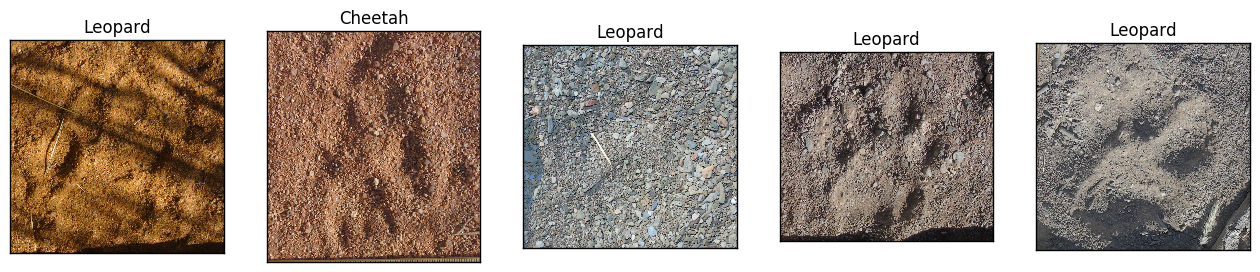

In [24]:
my_images.display(random_flag=True)

In [25]:
img_patches.freq()

[Frequency]

 Frequency for IMAGEDATA_YQN7P5
 
     Column  CharVar   FmtVar  Level  Frequency
 0  _label_  Cheetah  Cheetah      1     1923.0
 1  _label_  Leopard  Leopard      2     1492.0

+ Elapsed: 0.0142s, user: 0.02s, sys: 0.034s, mem: 47.5mb

In [26]:
img_crop.summary()

NOTE: Table IMAGEDATA_BEVSGR contains compressed images.
NOTE: 669 out of 669 images were scanned and results were saved to the summary table.


[Summary]

     Column    jpg  minWidth  maxWidth  minHeight  maxHeight   meanWidth  \
 0  _image_  669.0     328.0     512.0      274.0      512.0  510.769806   
 
    meanHeight  mean1stChannel  min1stChannel  max1stChannel  mean2ndChannel  \
 0  510.213752       79.151222            0.0          255.0       95.370492   
 
    min2ndChannel  max2ndChannel  mean3rdChannel  min3rdChannel  max3rdChannel  
 0            0.0          255.0      126.362882            0.0          255.0  

+ Elapsed: 0.179s, user: 7.52s, sys: 0.215s, mem: 5.19mb

# Model Class

In [27]:
from dl_api import VGG16, Model

In [32]:
new_model = VGG16(sess=sess, model_name='new_vgg16',
                  pre_train_weight=True, include_top=False,
                  nchannels=3, width=224, height=224, scale=1,
                  randomflip='HV', randomcrop='unique', offsets=(85, 111, 139))

NOTE: Cloud Analytic Services made the file vgg/vgg16_weights_table.sashdat available as table _IMAGENET_VGG16_WEIGHTS in caslib CASUSERHDFS(leliuz).


In [33]:
new_model.model_info()

[ModelInfo]

                                        Descr                         Value
 0                                 Model Name                     new_vgg16
 1                                 Model Type  Convolutional Neural Network
 2                           Number of Layers                            22
 3                     Number of Input Layers                             1
 4                    Number of Output Layers                             1
 5             Number of Convolutional Layers                            13
 6                   Number of Pooling Layers                             5
 7           Number of Fully Connected Layers                             2
 8  Approximate Memory Cost for Training (MB)                             1

+ Elapsed: 0.0346s, user: 0.128s, sys: 0.051s, mem: 11.9mb

In [34]:
new_model.model_weights.summary()

[Summary]

 Descriptive Statistics for _IMAGENET_VGG16_WEIGHTS
 
        Column       Min           Max           N  NMiss          Mean  \
 0   _layerid_  1.000000  1.700000e+01  14714688.0    0.0  1.348681e+01   
 1  _weightid_  0.000000  2.359807e+06  14714688.0    0.0  1.021032e+06   
 2    _weight_ -1.027151  9.431553e+00  14714688.0    0.0 -6.391602e-04   
 
             Sum            Std      StdErr           Var           USS  \
 0  1.984543e+08       2.937840    0.000766  8.630903e+00  2.803517e+09   
 1  1.502417e+13  702231.161243  183.064683  4.931286e+11  2.259640e+19   
 2 -9.405043e+03       0.010840    0.000003  1.175072e-04  1.735094e+03   
 
             CSS           CV        TValue  ProbT  
 0  1.270010e+08    21.783052  17609.896177    0.0  
 1  7.256233e+18    68.776577   5577.440823    0.0  
 2  1.729082e+03 -1695.987293   -226.179341    0.0  

+ Elapsed: 0.361s, user: 11.1s, sys: 0.022s, mem: 14.3mb

In [35]:
new_model.set_weights(model_weights=dict(name='_imagenet_vgg16_weights',
                                         where='_layerid_<10'))

In [36]:
new_model.model_weights.summary()

[Summary]

 Descriptive Statistics for _IMAGENET_VGG16_WEIGHTS
 
        Column       Min            Max          N  NMiss           Mean  \
 0   _layerid_  1.000000       9.000000  1735488.0    0.0       7.609691   
 1  _weightid_  0.000000  590079.000000  1735488.0    0.0  233972.767249   
 2    _weight_ -1.027151       2.064037  1735488.0    0.0      -0.000202   
 
             Sum            Std      StdErr           Var           USS  \
 0  1.320653e+07       1.618829    0.001229  2.620608e+00  1.050456e+08   
 1  4.060569e+11  172702.731648  131.095686  2.982623e+10  1.467693e+17   
 2 -3.510582e+02       0.018854    0.000014  3.554877e-04  6.170154e+02   
 
             CSS           CV       TValue         ProbT  
 0  4.548030e+06    21.273255  6192.654601  0.000000e+00  
 1  5.176304e+16    73.813176  1784.748034  0.000000e+00  
 2  6.169443e+02 -9320.833380   -14.133706  2.367912e-45  

+ Elapsed: 0.206s, user: 9.96s, sys: 0.015s, mem: 14.4mb

In [37]:
new_model.set_weights(model_weights='_imagenet_vgg16_weights')

In [38]:
new_model.model_weights.summary()

[Summary]

 Descriptive Statistics for _IMAGENET_VGG16_WEIGHTS
 
        Column       Min           Max            N  NMiss          Mean  \
 0   _layerid_  1.000000  2.100000e+01  138357544.0    0.0  1.859417e+01   
 1  _weightid_  0.000000  1.027645e+08  138357544.0    0.0  3.935094e+07   
 2    _weight_ -1.027151  9.431553e+00  138357544.0    0.0 -2.006022e-04   
 
             Sum           Std        StdErr           Var           USS  \
 0  2.572644e+09  2.055619e+00  1.747596e-04  4.225569e+00  4.842082e+10   
 1  5.444499e+15  3.283019e+07  2.791078e+03  1.077822e+15  3.633709e+23   
 2 -2.775483e+04  5.522869e-03  4.695299e-07  3.050208e-05  4.225760e+03   
 
             CSS           CV         TValue  ProbT  
 0  5.846393e+08    11.055179  106398.537196    0.0  
 1  1.491248e+23    83.429260   14098.828597    0.0  
 2  4.220193e+03 -2753.144683    -427.240473    0.0  

+ Elapsed: 0.299s, user: 19.9s, sys: 0.019s, mem: 13.1mb

In [39]:
tr_img.resize(width=224)

NOTE: Table IMAGEDATA_CNSVP0 contains compressed images.
NOTE: 535 out of 535 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_cnSvp0.


In [40]:
new_model.fit(tr_img.tbl,maxEpochs=1, logLevel=3)

NOTE:  Synchronous SGD is starting.
NOTE:  The total number of parameters is 134268738.
NOTE:  The approximate memory cost is 25977.00 MB.
NOTE:  Loading weights cost       2.72 (s).
NOTE:  Initializing each layer cost       4.34 (s).
NOTE:  The total number of workers is 3.
NOTE:  The total number of threads on each worker is 32.
NOTE:  The total number of minibatch size per thread on each worker is 1.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 96.
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0               96  0.0001          0.7949      0.6458        22.37
NOTE:        1               96  0.0001          0.7305      0.4792        22.78
NOTE:        2               96  0.0001          0.6992      0.4896        22.63
NOTE:        3               96  0.0001          0.6406      0.3125        23.01
NOTE:        4               94  0.0001          0.5987       0.234        22.9

[ModelInfo]

                                         Descr                         Value
 0                                  Model Name                     new_vgg16
 1                                  Model Type  Convolutional Neural Network
 2                            Number of Layers                            22
 3                      Number of Input Layers                             1
 4                     Number of Output Layers                             1
 5              Number of Convolutional Layers                            13
 6                    Number of Pooling Layers                             5
 7            Number of Fully Connected Layers                             2
 8                 Number of Weight Parameters                     134256320
 9                   Number of Bias Parameters                         12418
 10  Approximate Memory Cost for Training (MB)                         25977

[OptIterHistory]

    Epoch  LearningRate      Loss  FitError    L2Norm
 0    0.0        0.0001  0.680061  0.413084  2.389493

[OutputCasTables]

                 casLib             Name       Rows  Columns  \
 0  CASUSERHDFS(leliuz)  _model_weights_  134268738        3   
 
                                                     casTable  
 0  CASTable('_model_weights_', caslib='CASUSERHDFS(leliuz)')  

+ Elapsed: 156s, user: 8.56e+03s, sys: 198s, mem: 8.03e+04mb

In [41]:
te_img.resize(width=224)

NOTE: Table IMAGEDATA_QTD8HZ contains compressed images.
NOTE: 134 out of 134 images were processed successfully and saved as compressed images to the Cloud Analytic Services table ImageData_QTD8Hz.


In [42]:
new_model.predict(te_img.tbl)

([ScoreInfo]
 
                           Descr         Value
  0  Number of Observations Read           134
  1  Number of Observations Used           134
  2  Misclassification Error (%)      14.92537
  3                   Loss Error      0.492409
 
 [OutputCasTables]
 
                  casLib       Name  Rows  Columns  \
  0  CASUSERHDFS(leliuz)  valid_res   134        7   
  
                                                casTable  
  0  CASTable('valid_res', caslib='CASUSERHDFS(leliuz)')  
 
 + Elapsed: 15s, user: 427s, sys: 141s, mem: 7.12e+04mb, [Crosstab]
 
     _label_  Col1  Col2
  0  Cheetah  47.0  15.0
  1  Leopard   5.0  67.0
 
 + Elapsed: 0.0876s, user: 0.025s, sys: 0.124s, mem: 6.23mb)

## More is coming:

* Model.save()
* Model.load()
* Model.display_layers()
* Model.deploy()
* Model.build()
* Sequencial()
* Layers()
* Image save different patches as ImgID_PatchID.jpg.